### Introduction:

Restaurants make up a large percentage of businesses in the United States. However, many are not as successful. This has the potential to dissuade individuals from opening up their own small businesses, impacting dreams and even the economy as a whole. Therefore, it is extremely important to understand the factors that affect this. By utilizing the dataset developed by Yelp, we were aiming to find the sources of failure and characteristics of success for restaurants across the United States. We looked at randomly chosen restaurants in all 50 states of the United States so that we can further generalize our results to the entirety of the United States. We also wanted the restaurant to be pretty representative of the country as a whole. For example, Illinois restaurants were meant to represent the midwest region, California restaurants are meant to reflect the results of the west coast, and Florida restaurants are meant to represent the east and southern regions of the United States. Specifically, we wanted to look at the relationship between the number of reviews and whether or not a restaurant was classified as closed. We also wanted to identify the general tone of reviews across various restaurants to see whether the tones differed for restaurants that were open rather than closed. With our analysis, it was concluded that there was a negative correlation between the review stars and the total hours open for restaurants and between the review stars and the total closed hours. However, the relationship between those variables was weaker for closed restuarants. In general, for the open restaurants, it was found that as polarity increases, the subjectivity also increases. This trend differs slightly for closed restaurants where the reviews had stronger words to express certain positive and negative opinions and views on restaurants. With our hypothesis tests, we found that there was insufficient evidence that there is a relationship between the polarity of the reviews and the star ratings of restaurants in 13 states. However, we did find sufficient evidence that there is the number of service hours a restuarant is open for directly influences whether or not a restuarant is successful. 

### Data Description:
Yelp is the funding agency for the creation of this dataset. Its associated funding type is also by grants. Yelp engineers developed a search engine to look through millions of reviews in order for individuals to identify local businesses that best suit their needs. According to Yelp, this dataset is used for learning purposes. It was originally used for the Yelp Dataset Challenge where students were prompted to come up with an interesting project for the opportunity to win awards for $5,000 and other smaller recognitions. Their goal in creating this dataset was to use JSON files to teach students about databases and NLP, and to showcase a subset of their business data for individuals to use professionally and academically for their own purposes.

Since peoples’ reviews were involved in this dataset, it is important to understand how their data was used and whether it would be considered ethical. In the privacy policy in the terms of conditions stated by Yelp, it warns businesses and residents who submit reviews that Yelp will collect “various categories of personal information when they use the service” (https://terms.yelp.com/privacy/en_us/20200101_en_us/#:~:text=Yelp%20does%20not%20sell%20your,disclosure%20of%20your%20personal%20information). If most people ignored the terms of conditions when creating an account to post reviews or do searching on Yelp, they probably would have no idea that their data has been used in this dataset. Some people in the minority may have at least skimmed over the privacy policy and realized that Yelp would be using some of their personal data and public data that they posted themselves to aggregate information. Businesses are also consenting to having some of their information shared and collected by the company. Therefore, it can be argued that although users did not explicitly agree to take part in this experiment or dataset, they still did agree to their conditions. 
 
The observations in the Yelp Business Dataset are done by businesses (identified by their business IDs). Each business is accompanied by their name, address, city, state, postal code, latitude, longitude, review stars, number of reviews, whether or not the business is closed or not, categories (industry), specific attributes of the businesses depending on their categories, and hours of operation. The "business_id" refers to a 22 character unique string business id that allows for a distinct identification of the business. The "name" refers to the business's name. The "address" refers to the full address of the business (location). The "city" refers to which specific location/place the business is situated in. The "state" refers to a two character string state code. The "latitude" refers to a float representing a coordinate that specifies the north-south positioning of the business on the Earth. The "longitude" refers to a float representing a coordinate that specifies the east-west positioning of the business on the Earth. The "stars" represent a float star rating, rounded to half-stars. The "review-count" refers to the integer number of reviews. The "is_open" refers to an integer, 0 or 1 for closed or open respectfully, indicating whether or not the business is still open to the public currently. The "attributes" refers to an object showcasing business attributes to values. The "categories" refer to an array of strings of the business categories. Finally, the "hours" refers to an object of "key day to value hours" according to the documentation provided by Yelp. Specifically, the hours are using a 24 hour clock. 

The observations in the Yelp Tips Dataset are done by businesses (identified by their business IDs). Each business is accompanied by certain users, their respective review text, the date they submitted their reviews, and the complement counts. The "business_id" again refers to a 22 character unique string business id that allows for a distinct identification of the business. The "text" refers to a string showcasing the text of the tip or review. The "date" refers to a string representing when the tip was  written. It is formatted as YYYY-MM-DD where YYYY is the year, MM is the month, and DD is the day. The "compliment_count" refers to an integer value of how many compliments that specific tip has for the certain business it is associated with. Finally, the "user_id" represents the 22 character string that is unique to each user who submits a tip/review.  

The raw dataset that was downloaded from the Yelp Dataset was divided up into separate files that were consistent with a certain theme. For example, one data file that we used included data solely focused on businesses and another included data solely focused on review data. To further clean up the datasets, there were numerous steps done to filter the data frames that were created in order to fit the questions we were looking to answer with our analysis. 

In our cleaned dataset, we filtered by state, using the state field in both the Business Dataset and the Tips Dataset. Then, we retrieved a set of random restaurants from each state (100 restaurants from each state). We also took out other data from provinces in Canada such as Alberta. Our final cleaned datasets with cleaning descriptions and code are located under the file name yelp_dataset-Copy1.ipynb which is also linked in the Source Code and Repository section below.

It should be noted that the Yelp data is a bit restricted since it explicitly does not contain data that may be strictly confidential and protected by legal privilege. For example, there is a bit of anonymity with the businesses since the owners are not stated within the dataset and protected characteristics like race and gender are not included. Abiding with these legal protections is necessary so that Yelp as a company could avoid legal trouble associated with publically publishing this data.


### Preregistration Statements:
In this project, we aimed to do analysis on whether the star rating of a restaurant increases as the polarity of the review increases. Essentially, by using textblob (a python library used for Natural Language Processing), we are hoping to see this relationship. Polarity refers to how positive or negative a piece of text is from -1 to 1, where a negative number signifies a negative sentiment while a positive number signifies a positive sentiment. Subjectivity is a measure of whether or not a piece of text is subjective or objective between 0 and 1 where 0 is very objective and 1 is very subjective. 

To see this graphically, we plan to create visualizations of polarity vs. subjectivity to analyze the relationship amongst the restaurants and whether or not this is affected by whether or not they are open or closed. If there is an upward trend, it is likely that as polarity increases, the subjectivity also increases, suggesting those who are reviewing the restuarant are much more opinionated. If the slope of the regression lines are shown to be quite steep, this would mean the reviews are either extremely negative or extremely positive. 

To test this, we also plan to complete a hypothesis test checking whether or not there is a relationship between the polarity of a review and the star rating of the restuarant using the data we filtered out for the 13 states. If we find that the resulting p-value is greater than the significance level, we would end up having insufficient evidence to conclude that there is a relationship between these variables. 

Another one we wanted to look at was whether the number of service hours a restaurant is open for is independent of whether or not the restaurant is no longer in business. 

To test this out, since we are looking at a binary variable (is_open) and a non-binary variable (total_hrs), we are planning to conduct a chi-squared test for independence. If we find that the p-value is less than the significance level of 0.5, we can conclude that we know that it is highly likely that there is a relationship between the number of hours a restuarant is open in a week and whether the business is still open for the public. 

### Interpretation and Conclusions:
After conducting our analysis, we found that there is a weak, negative correlation between total hours a closed restaurant was open weekly and the average number of stars as the coefficient came out to be -0.306. This means that we found that as the average number of total hours open increases, the average number of stars decreases. Interpreting the equation for the line of best fit in this case, if the number of total hours that the restaurant was opened previously before it closed down permanently was 0, the average number of stars would be around 4.169. As the total number of hours opened increases by one hour, the average number of stars decreases by 0.0089 stars. 

We also found that there is a weak, negative correlation between total hours a still opened restaurant was open weekly and the average number of stars in its rating as the coefficient came out to be -0.498. This means that we found that as the average number of total hours open increases, the average number of stars decreases for still opened restaurants. Interpreting the equation for the line of best fit in this case, if the number of total hours that the restaurant is opened was 0, the average number of stars would be around 4.689. As the total number of hours opened increases by one hour, the average number of stars decreases by -0.0147 stars. 

After conducting a logistic regression on the review counts of the restaurants in our sample and whether or not the restaurant was still open (the binary output variable), we found that an open restaurant has a 2.244% times the odds of closed restaurants to have a smaller number of reviews. This is interesting since it suggests that open restaurants generally have less reviews written about them than closed restaurants. 

When looking at our tip data, we wanted to focus on the most used non-stopword words (words that weren’t as relevant context words to decide the intensity of specific words within a review given the algorithm established through the Natural Language Toolkit). This toolkit was extremely helpful, and through working with it, we found that “great” was the most used word while “back” was the least used word. 

To further look at the idea of subjectivity and polarity within our tip data, we created visualizations of polarity vs. subjectivity to analyze the relationship between restaurants and to see the differences between open and closed restaurants. For open restaurants, we found that there was an upward trend where as polarity increased, subjectivity also increased. However, some plots also showed polarity converging to 1 or -1 as subjectivity increased, suggesting that more opinionated or passionate individuals were choosing to review these open restaurants with words characterized as having greater intensity than others. When looking at closed restaurants, the regression lines in most graphs were steeper than ones on the open restaurants. This suggests that the reviews were on either extremes of intensity: either very positive or extremely negative, further highlighting how the reviews had stronger words to represent the respective negative or positive views of those posting those reviews. 

In terms of testing our preregistration statements, we first looked at the relationship between the polarity of a review and the star rating of the restaurant in the 13 states. After conducting a one sample t-test on our data, we found that the p-value was very high at 0.999 which is greater than the significance level of 0.05. Due to this, we fail to reject the null hypothesis and had insufficient evidence to conclude that there was a relationship between the polarity of reviews and the star ratings of the restaurants that were chosen in 13 states. This is not what we expected to see from our data which surprised us, since we thought initially that individuals who are more opinionated or have a tendency to find a particular restuarant to be extremely negative or positive in terms of their experience with it would be more likely to write reviews in the first place. Due to this, we believed that there would be more of a relationship between extremely negative or positive reviews and the corresponding star ratings the restuarants receive, but according to our test, this was unfortunately not the case. 

We then looked at the question of if the number of service hours a restaurant is open for is independent of whether or not the restaurant is no longer in business. After conducting a chi-square test for independence, we found that the p-value of 1.44e-09 was less than the significance level of 0.05, suggesting that there is very high likelihood that there is a relationship between the number of service hours a restaurant is open for in a weekly time period and whether or not the restaurant is still in business. This is interesting as it highlights the importance of having enough open service hours in order for a restaurant to be successful. It also suggests that the number of service hours a restaurant is open is a vital factor influencing whether or not a restaurant thrives. This is what we expected, so it is interesting to think about how factors that can initially seem so trivial like how long the business is open can have such a dramatic affect on the survival of a business in the long run. 


### Limitations:
On our end, the file sizes were a real limitation to our analysis. For example, we were originally looking to work with the Yelp Reviews Dataset, but the file size exceeded 6 GB. Due to this, Jupyter Notebook would give errors referencing its lack of memory for dealing with a file of this magnitude. Due to this, we had to pivot our research questions and analysis to reference the Tips Dataset. However, this means that we have less data points that we can use to analyze restaurants that have failed. Initially, we were curious to see whether the number of reviews and the associated common words found in reviews had any correlation to whether or not a business remained open. Now, without this portion of data, we have to focus more on restaurants that have been successful which may be harder to generalize for our conclusions.

A second limitation could be that in deleting stopwords, we lose 71% of context in our tip_data text data that could lead to inaccurate findings from our sentiment analysis. For example, a negative comment could be deemed neutral because most of the stopwords it contained were removed, and it just so happened that these words were critical to the sentiment. Also, we lose the case sensitivity and the punctuation which also impacts sentiment and our overall analysis as a result. For example, certain words that are shown to be associated with negativity could actually be positive in certain contexts and with certain attributes like punctuation. An example of this is the word "terrifying." At first glance, this would be deemed negative. However, if one were to say "this food is terrifyingly good" or if they are instead referring to a competing restaurant and their comparative "terrifying" service, this word could end up being positive in context.  

Another limitation to our data is the fact that the dataset focuses on only local businesses. This means that the data excludes restaurant data that includes popular franchises such as fast food restaurant chains. These restaurants can have impacts on whether or not certain local businesses remain open, but since these aren’t included in the dataset, we can’t look at the impact of these and their distances from certain businesses in our analysis.


### Source Code and Repository
- https://github.coecis.cornell.edu/zm68/INFO-2950-Project
- https://www.yelp.com/dataset (The original source with full dataset and documentation available)
- https://drive.google.com/file/d/1Yu7s_-nPZoTu4p7nv4VfQkHnOyF9yRKK/view?usp=sharing (raw business data)
- https://drive.google.com/file/d/1m_f6NVsDzXKE5gYcAdgeqaCmkT6JpYQ7/view?usp=sharing (raw tip data)
- https://github.coecis.cornell.edu/zm68/INFO-2950-Project/blob/main/yelp_dataset-Copy1.ipynb (data cleaning jupyter notebook file)

### Acknowledgements:
We would like to especially acknowledge Stack Overflow for help with errors and understanding how to calculate the number of words in a string in a dataframe. This was really helpful in the tip data section. We also found Geeks For Geeks extremely helpful to learn how to use NLTK for lemmatization and regex methods to remove punctuation from strings for our tip data section. The NLTK documentation was also very helpful to understand how to clean up our tip data and how to approach our analysis on sentiment.

### Questions for Reviewers:
- Should we use a Spearman or Pearson correlation when using our Stars of Reviews variable?
- Is there too much description of data cleaning?
- Where do we put the description of the other file where the data cleaning is?


### Appendix: Data Collection/Cleaning/Analysis

Since the original data was compiled into a tarfile, to access it within Jupyter Notebook, we had to first import the tarfile library in Python so that we could read and write with tar archive files. Then, we opened our dataset from the Yelp Database and extracted all the files. After, we closed the tar file.

To start doing some cleaning on our chosen data, we first imported the json, pandas, and numpy library. We also loaded the sql extension.

In [1]:
import json
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

We opened the Yelp Academic Dataset Business Json file and read it. We then converted the file into a CSV file so that we could more easily manipulate and clean the data.

After converting the data, we used the pandas library to read the csv file and set it equal to a data frame we called data.

First, we wanted to extract all the businesses that were categorized as restaurants, so we looked at the categories column in our data frame and picked out businesses where the content in their category descriptions included the word "Restaurants" in them. We then displayed that data to check whether this piece of code worked.

We are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and filtering them down even more to only include restaurants that were located in a certain area. In this case, we looked at restaurants in the 13 different states so that we could encompass a good portion of the United States. This way, our results and analysis can then be generalized for the entirety of the country.

In [3]:
data = pd.read_csv("data.csv")

In [4]:
%sql states << SELECT state FROM data GROUP BY state

Returning data to local variable states


We got rid of AB, which is the state code for Alberta, a province in Canada. North Carolina has too little data compared to the other states we found, so we eliminated that as well using SQL.

In [5]:
%sql states << SELECT state FROM data WHERE state != 'AB' and state != 'NC' GROUP BY state 
states

Returning data to local variable states


,state
0,PA
1,TN
2,IN
3,FL
4,NV
5,IL
6,AZ
7,LA
8,CA
9,NJ


We are getting random samples of 100 restaurants from each of the 13 states we are finding data on. The individual data for each state in then concatenated into a single dataframe so that we can find trends and patterns on the data from all of the states as a whole rather than each one of them individually. We decided to create random samples so that the data is more representative of the population of restuarants in the US as a whole. Then, we saved this dataframe into its own CSV file and read that file.

In [6]:
all_samples_df = pd.read_csv("all_samples.csv")

We are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and checking whether the restaurants are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants in the 13 states that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents to showcase the magnitude in change of the number of rows after the cleaning.

In [7]:
is_closed = pd.read_csv("is_closed.csv")

Now, we are creating a new data frame with restaurants from the 13 states that are still open from our samples of 1300 total restaurants, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants.

In [8]:
is_open = pd.read_csv("is_open.csv")

We created a function that could find, from the hours column (the timings that restaurants are opened each day) in our data frames. In open_hrs, there is one parameter called biz_hrs which takes in column hours in any of the data frames we created above. Then, we first separated the string in the hours column that is passed in by using the commas to split the string up. After, we used a for loop to find the day of the week from the split up string by looking for the colon and taking a portion of the string that was before this colon. This was set to dayofWeek. Then, we got the open hours by splitting at the dashes. Then, we found the actual open and closed times by hours and minutes and converted the values into integers. We put these variables into a list and checked, with an if statement, whether the closed hours were less than 12 hours. If they were, we added 24 to it so that we could later find the difference between the closed hours and the open hours. The same thing was done with the minutes. Then, we checked whether the minutes found were equal to 60 minutes so that we could just, in that situation, add onto the hours instead. We then created a sum variable that is a list of the hours and minutes. The total hours open were then found by taking summing together the hours and the minutes, and printed this variable (total_hrs) out for reference and returned it in the function. To check whether this function worked, we ran this function with the restaurants in the closed restaurants data frame and the open restaurants data frame.

In [9]:
def open_hrs(biz_hrs): 
    # separate string by commas
    hrsum = 0;
    minsum = 0;
    hrs = biz_hrs[1:len(biz_hrs)-1].split(", ")
    for day in hrs:
        dayofWeek = day[:day.find(":")]
        open_hrs = day[day.find(": ")+3:].split("-")
    
        # true opening/closing time
        open_hr = int(open_hrs[0][:open_hrs[0].find(":")]) 
        open_min = int(open_hrs[0][open_hrs[0].find(":")+1:])
        closed_hr = int(open_hrs[1][:open_hrs[1].find(":")])
        closed_min = int(open_hrs[1][open_hrs[1].find(":")+1:len(open_hrs[1])-1])
        
        # true operating hours and mins
        open_hrs = [open_hr, closed_hr]
        open_mins = [open_min, closed_min]
        if open_hrs[1] < 12:
            open_hrs[1] += 24
        hrsum += abs(open_hrs[1] - open_hrs[0])
        minsum += abs(open_mins[1] - open_mins[0])
        if minsum == 60:
            hrsum += 1
            minsum = 0
    sum = [hrsum, minsum]
    total_hrs = sum[0] + sum[1]/60
    return total_hrs

Here, we are checking whether the restaurants in our sample are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants in the sample that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents. We have also displayed the average number of stars of open restaurants and the average total hours of closed restaurants (when they were still operating). We added the Spearman correlation as stars are a sort of ranking measure, so this correlation type would work better in comparison to Pearson. However, we also included the Pearson correlation as we wanted to compare the two. 

In [10]:
closed_biz_hrs = pd.read_csv("closed_biz_hrs.csv")

print("Avg stars of closed restaurants: " + str(np.mean(closed_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of closed businesses: " + str(np.mean(closed_biz_hrs["total_hrs"])))
print("Standard Deviation of hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(closed_biz_hrs["total_hrs"], closed_biz_hrs["stars"]))

# Pearson correlation
print(stats.pearsonr(closed_biz_hrs["total_hrs"], closed_biz_hrs["stars"]))

Avg stars of closed restaurants: 3.5657894736842106
Standard Deviation of stars: 0.7468642768778884

Avg total hours of closed businesses: 67.79351851851851
Standard Deviation of hours: 24.703607014833974

SpearmanrResult(correlation=-0.30569718360321535, pvalue=7.862757791378476e-09)
(-0.2943134095267811, 2.919456113943866e-08)


This plot is used to showcase the relationship between the total hours open for closed restaurants and their respective star ratings. We have included the calculations for the line of best fit for the data. 

[-0.00889798  4.16901477]
The equation for the line is y = -0.008897978811340917x + 4.169014765008235


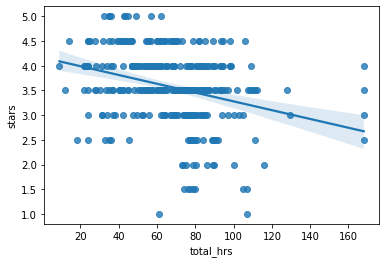

In [11]:
sns.regplot(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"])
coeff = np.polyfit(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*closed_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Now, we are creating a new data frame with restaurants in our sample that are still open, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants. We have also displayed the average number of stars of open restaurants and the average total hours of open businesses. We included the Spearman correlation on the total hours open for still opened restaurants and the star ratings as again we are looking at ranked data in this case. Though, we also added the Pearson correlation for comparison.

In [12]:
open_biz_hrs = pd.read_csv("open_biz_hrs.csv")

print("Avg stars of open restaurants: " + str(np.mean(open_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of open businesses: " + str(np.mean(open_biz_hrs["total_hrs"])))
print("Standard Deviation of total hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(open_biz_hrs["total_hrs"], open_biz_hrs["stars"]))

# Pearson correlation
print(stats.pearsonr(open_biz_hrs["total_hrs"], open_biz_hrs["stars"]))

Avg stars of open restaurants: 3.5109603340292277
Standard Deviation of stars: 0.7468642768778884

Avg total hours of open businesses: 80.34542449547669
Standard Deviation of total hours: 24.703607014833974

SpearmanrResult(correlation=-0.49766074438264385, pvalue=4.340577260254975e-61)
(-0.5120639793302013, 3.7411382306846673e-65)


This plot is used to showcase the relationship between the total hours open for open restaurants and their respective star ratings. We have included the calculations for the line of best fit for the data.

[-0.01466455  4.68918984]
The equation for the line is y = -0.014664550163410107x + 4.689189841943624


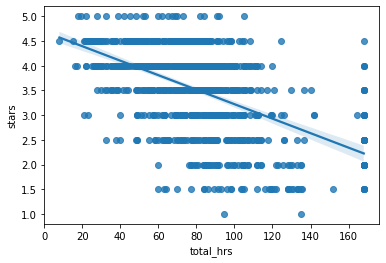

In [13]:
sns.regplot(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"])
coeff = np.polyfit(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*open_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Findings:
 - On both plots, the slope comparing total hours of a restaurant per week and stars of restaurants on 2nd Ave is somewhat steep.  There's a bit of scatter among the points, but the general trend is shown to be in the negative direction, suggesting that as total hours (both open and closed) increases, the stars on the reviews decrease.
 - Upon running a Spearman correlation, we discovered there's a weak negative correlation between total hours and star ratings.
 
What this means:
 - For both open and closed restaurants, total hours open per week are weakly related to the average star rating received by the restaurant.  From the Spearman correlation, this suggests that hours slightly impact the star rating received by our restaurant.

<AxesSubplot:xlabel='state', ylabel='stars'>

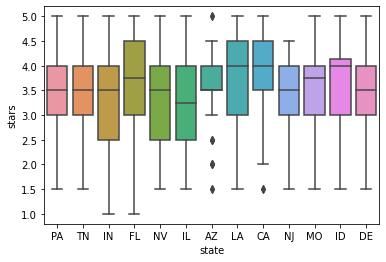

In [14]:
sns.boxplot(x='state',y='stars', data=all_samples_df)

<AxesSubplot:xlabel='is_open', ylabel='stars'>

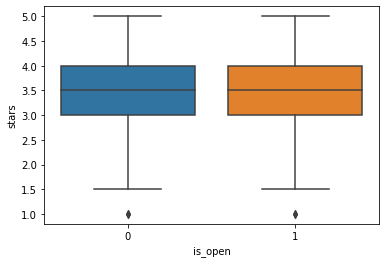

In [15]:
sns.boxplot(x='is_open',y='stars', data=all_samples_df)

The box and whisker plots give us even more evidence to support the idea that there's a weak correlation between whether or not a restaurant is open and its star ratings. This is because the minimum, maximum, and interquartile range and median are all very similar, thus do not suggest that the stars given are different for restaurants that are out of business versus in business.

Source of the following procedure: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

We wanted to see the star rating of the restaurants relative to the place in the United States, so using latitude and longitude, we graphed the star of the restaurant on a map of the United States.

In [ ]:
pip install descartes
pip install geopandas

In [16]:
# Must download descartes and geopandas packages into conda environment
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Here, we read the a shape file of the United States using geopandas.

In [17]:
us_map = gpd.read_file("./us_states_shp_files/cb_2021_us_state_20m.shp")

Here, we specify a coordinate reference system (CRS), which will tell Python how to organize coordinates relative to the map.  In order to do so, we initialized an authority code, which is EPSG:4326.  This will use latitude and longitude as projections for graphing the data.  Then, we made a geometry point (which is basically latitude and longitude in a Point object, and is the proper format for graphing things).

In [18]:
crs = {'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(all_samples_df["longitude"], all_samples_df["latitude"])]
geometry[:3]

We saved the original dataframe (with the new geometry point in a column) into a GeoDataFrame.

In [19]:
geo_df = gpd.GeoDataFrame(all_samples_df, crs = crs, geometry = geometry)

Now we graph the map of the 1300 restaurants in the United States.  We labeled each restaurant based on the star rating they have, as defined in the legend.

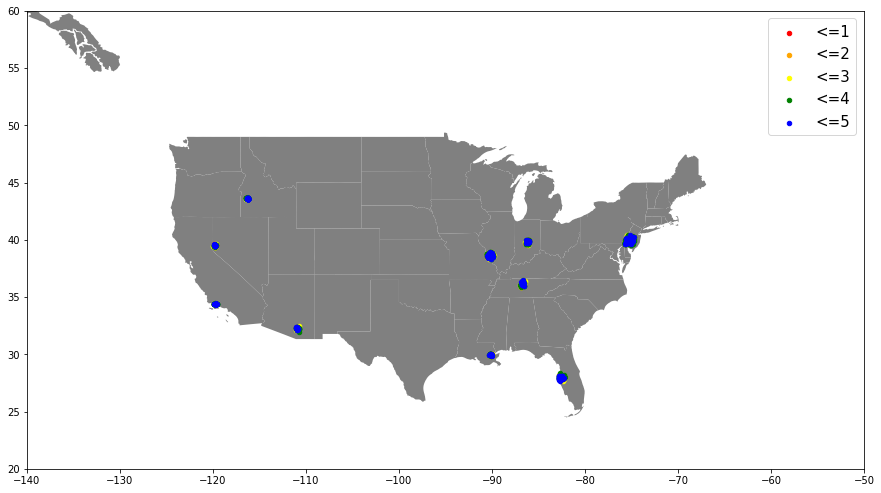

In [20]:
fig,ax = plt.subplots(figsize=(15, 15))
for ax in fig.axes:
    ax.set_xlim(-140, -50)
    ax.set_ylim(20, 60)
us_map.plot(ax = ax, color="grey")
geo_df[geo_df["stars"]<=1.0].plot(ax=ax, markersize=20, color='red', marker='o', label='<=1')
geo_df[(geo_df["stars"] > 1.0) & (geo_df["stars"] <= 2.0)].plot(ax=ax, markersize=20, color='orange', marker='o', label='<=2')
geo_df[(geo_df["stars"] > 2.0) & (geo_df["stars"] <= 3.0)].plot(ax=ax, markersize=20, color='yellow', marker='o', label='<=3')
geo_df[(geo_df["stars"] > 3.0) & (geo_df["stars"] <= 4.0)].plot(ax=ax, markersize=20, color='green', marker='o', label='<=4')
geo_df[(geo_df["stars"] > 4.0) & (geo_df["stars"] <= 5.0)].plot(ax=ax, markersize=20, color='blue', marker='o', label='<=5')
plt.legend(prop={'size': 15})

The above shows how clustered each city is with ratings (due to the randomness of samples).  In an attempt to take a closer look, we used shapefiles by state to take a closer look.

Data Source: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html \
From "County Subdivisions" section on website

Here, we read each shape file and saved it into a map.  We followed the same procedure as above, and used a for loop to create all maps.

In [21]:
pa_map = gpd.read_file("./pa_shp_files/cb_2021_42_cousub_500k.shp")
tn_map = gpd.read_file("./tn_shp_files/cb_2021_47_cousub_500k.shp")
in_map = gpd.read_file("./in_shp_files/cb_2021_18_cousub_500k.shp")
fl_map = gpd.read_file("./fl_shp_files/cb_2021_12_cousub_500k.shp")
nv_map = gpd.read_file("./nv_shp_files/cb_2021_32_cousub_500k.shp")
il_map = gpd.read_file("./il_shp_files/cb_2021_17_cousub_500k.shp")
az_map = gpd.read_file("./az_shp_files/cb_2021_04_cousub_500k.shp")
la_map = gpd.read_file("./la_shp_files/cb_2021_22_cousub_500k.shp")
ca_map = gpd.read_file("./ca_shp_files/cb_2021_06_cousub_500k.shp")
nj_map = gpd.read_file("./nj_shp_files/cb_2021_34_cousub_500k.shp")
mo_map = gpd.read_file("./mo_shp_files/cb_2021_29_cousub_500k.shp")
id_map = gpd.read_file("./id_shp_files/cb_2021_16_cousub_500k.shp")
de_map = gpd.read_file("./de_shp_files/cb_2021_10_cousub_500k.shp")
maps = [pa_map, tn_map, in_map, fl_map, nv_map, il_map, az_map, la_map, ca_map, nj_map, mo_map, id_map, de_map]

pa_sample = pd.read_csv("pa_sample.csv")
tn_sample = pd.read_csv("tn_sample.csv")
in_sample = pd.read_csv("in_sample.csv")
fl_sample = pd.read_csv("fl_sample.csv")
nv_sample = pd.read_csv("nv_sample.csv")
il_sample = pd.read_csv("il_sample.csv")
az_sample = pd.read_csv("az_sample.csv")
la_sample = pd.read_csv("la_sample.csv")
ca_sample = pd.read_csv("ca_sample.csv")
nj_sample = pd.read_csv("nj_sample.csv")
mo_sample = pd.read_csv("mo_sample.csv")
id_sample = pd.read_csv("id_sample.csv")
de_sample = pd.read_csv("de_sample.csv")
csvs = [pa_sample, tn_sample, in_sample, fl_sample, nv_sample, il_sample, az_sample, la_sample, ca_sample, nj_sample, mo_sample, id_sample, de_sample]

In [22]:
crs = {'init': 'epsg:4326'}

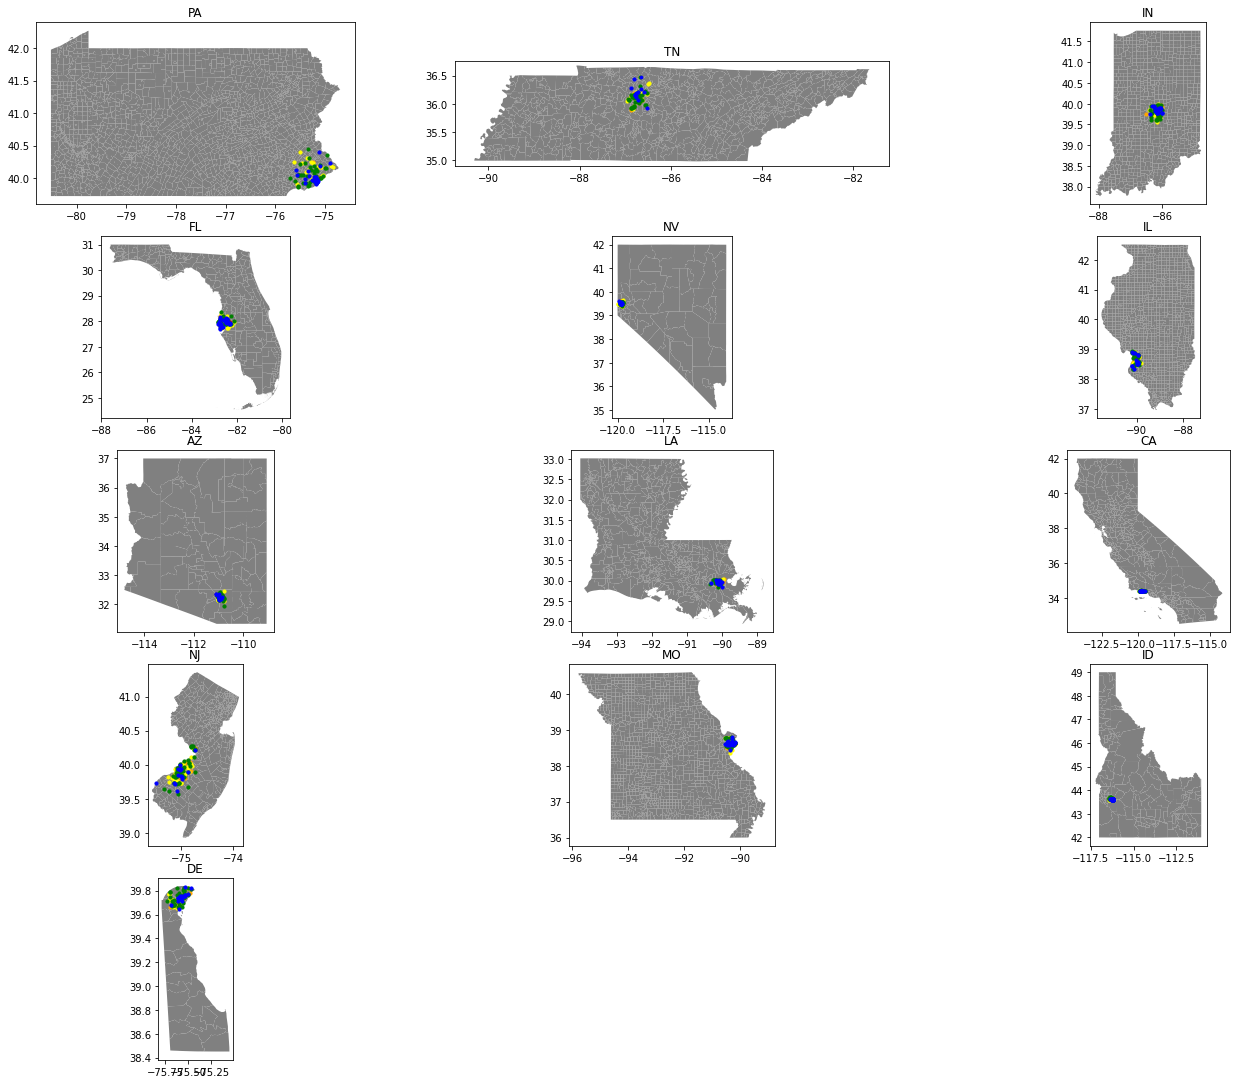

In [23]:
geo_names = []

fig1, ax1 = plt.subplots(5, 3, figsize=(20,15))
fig1.tight_layout()
row = 0
col = 0

for i in states["state"]:
    state_name = "geometry_" + i.lower()
    geo_names.append(state_name)
for sample in range(len(csvs)):
    geometry = [Point(xy) for xy in zip(csvs[sample]["longitude"], csvs[sample]["latitude"])]
    geo_df = gpd.GeoDataFrame(csvs[sample], crs = crs, geometry = geometry)
#     geo_df.to_csv(geo_names[sample] + ".csv")
    geo_df.head()
    maps[sample].plot(ax = ax1[row,col], color="grey")
    ax1[row,col].title.set_text(states["state"][sample])
    geo_df[geo_df["stars"]<=1.0].plot(ax=ax1[row,col], markersize=10, color='red', marker='o', label='<=1')
    geo_df[(geo_df["stars"] > 1.0) & (geo_df["stars"] <= 2.0)].plot(ax=ax1[row,col], markersize=10, color='orange', marker='o', label='<=2')
    geo_df[(geo_df["stars"] > 2.0) & (geo_df["stars"] <= 3.0)].plot(ax=ax1[row,col], markersize=10, color='yellow', marker='o', label='<=3')
    geo_df[(geo_df["stars"] > 3.0) & (geo_df["stars"] <= 4.0)].plot(ax=ax1[row,col], markersize=10, color='green', marker='o', label='<=4')
    geo_df[(geo_df["stars"] > 4.0) & (geo_df["stars"] <= 5.0)].plot(ax=ax1[row,col], markersize=10, color='blue', marker='o', label='<=5')
    col += 1
    if col > 2:
        row += 1
        col = 0
ax1[4,1].remove()
ax1[4,2].remove()

#### Limitations

In the maps above, these random samples may not be accurate to the entire state, especially since they are all clustered in one part of the state.  Even though we sampled from the whole dataset (after cleaning it), it's strange how these samples have been clustered into one region or portion of each state.

#### Findings

Upon closer look at the distribution of ratings, it seems like the stars between 4 and 5 are pretty much evenly distributed.  In states where restaurant data points are on the border of the state, such as PA and FL, it seems like the restaurants are rated fairly well on the edge compared to when they get close to the center of the mainland.  However, there is no conclusive evidence for any such claim, especially since these restaurants are not representative of the whole state as they are shown to be clustered around certain areas of each state.

Below, we are putting the restaurants into a dataframe with only the column denoting whether it's open (is_open) and the number of reviews per restaurant (review_count) so that we can compare the results.

In [24]:
is_open_review = all_samples_df[["is_open", "review_count"]]
print(len(is_open_review))
is_open_review

1300


,is_open,review_count
0,1,302
1,1,24
2,1,132
3,1,34
4,1,118
...,...,...
1295,1,247
1296,1,38
1297,1,13
1298,1,24


Here, we are computing a logistic regression on the review counts of the restaurants and whether or not the restaurant is still open since is_open is a binary output variable. 

Coefficient: [[0.00265812]]
Intercept (beta)): [0.8084088]
Odds Ratio: [2.24433395]


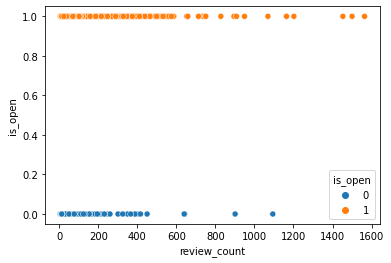

In [25]:
x = np.array(is_open_review["review_count"]).reshape(-1, 1)
y = np.array(is_open_review["is_open"])
sns.scatterplot(data=is_open_review, x="review_count", y="is_open", hue="is_open")
reg = LogisticRegression()
reg.fit(x, y)
print("Coefficient: " + str(reg.coef_))
print("Intercept (beta)): " + str(reg.intercept_))
print("Odds Ratio: " + str(math.e**reg.intercept_))

Interpretation (https://quantifyinghealth.com/interpret-logistic-regression-coefficients/):
 - A open restaurant has (2.244-1)% reduction in reviews.

Here, we opened the Yelp Academic Dataset Tip Json file and read it. We then converted the file into a CSV file so that we could more easily manipulate and clean the data.

In [26]:
tip_data = pd.read_csv('tip_data.csv')

We are joining the two individual datasets together by business_id which is common in both files so that we can get more information about the reviews and the dates they were collected.

After combining the tip data with the data from the 13 states, we started to analyze the tip text using a sentiment analysis technique. First, we imported stopwords which are typically words that don't add meaning to text so that we could single out important words that could provide us with more information about whether the reviews were negative or positive in sentiment. Words that are not stopwords, for example, are words such as adverbs like "very" and "not" that impact the intensity or meaning of the word that comes after. This impacts the intensity as the main word in question is being modified by the context around it.

We referenced https://www.nltk.org/api/nltk.html to clean the tip data and https://youtu.be/0j3l5GciFIo to understand an approach for tsentiment analysis.

In [27]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

After importing the stopwords, we wanted to find the percentage of words in each review that were stop words to see how much data from the text would be lost. To do this, we found the number of words in each tip text and the number of words in each text that was a stopword.

Next, we sorted the stopword_ratio in descending order because the greater the stopword_ratio, the more data will be lost because that means most of the text was stopwords. The stopword_ratio is essentially how many stopwords are in the individual reviews over the total number of words in the review. 

To clean the text data, we got rid of any punctuation that remained and made all characters lowercase. We referenced Geeks for Geeks for the regex way to remove punctuation: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

We then stripped the text so that no stopwords were contained in them.

For our first visualization using the tip dataset, we found the most used non-stopword words used in the tip_data["text"] section.

We referred to https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe to find the value_counts() function.

In [28]:
word_count = pd.read_csv("word_count.csv")
word_count.index = word_count.iloc[:, 0]

<AxesSubplot:ylabel='Unnamed: 0'>

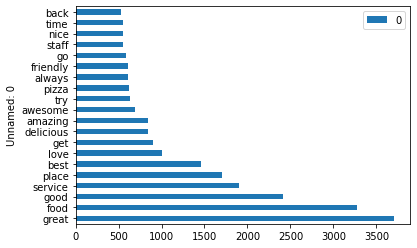

In [29]:
word_count[:20].plot(kind="barh")

The last step we took was lemmatizing our words, meaning that we would change all of the words back to their basic forms. We referenced https://www.geeksforgeeks.org/python-lemmatization-with-nltk/ on how to use nltk for lemmatization.

In [30]:
from nltk.stem import WordNetLemmatizer

# Sentiment Analysis Using Polarity and Subjectivity Measures

We then imported textblob (a python library used for Natural Language Processing) to use the function. **Polarity** is how positive or negative a piece of text is from -1 to 1, where a negative number signifies a negative sentiment. **Subjectivity** is a measure of whether or not a piece of text is subjective or objective between 0 and 1.

In [31]:
from textblob import TextBlob

We further cleaned tip_data by removing columns that we would not be using during our analyses.

Next, we decided to create visualizations of the polarity vs subjectivity to see their relationship amongst the restaurants and to see if there was a difference in this relationship for restaurants that were closed vs open. We referenced homework 3 problem 13 to create the plotting function and to use .apply() to graph every single unique restaurant we had in our data.

The source for this code was from https://stackoverflow.com/questions/33150510/how-to-create-groupby-subplots-in-pandas.

In [85]:
# Create plotting function
def plot_by_biz(df):
    count = 0
    fig2, axes2 = plt.subplots(17,18, figsize=(100,100))
    for (biz, group), ax in zip(df.groupby("business_id"), axes2.flatten()):
        group.plot(x='polarity', y='subjectivity', kind='scatter', ax=ax, title=biz)
        count += 1
    unused = (17*18)-count
    for i in range(unused):
        fig2.delaxes(axes2.flatten()[(17*18) - i - 1])

In [87]:
%sql open_tip << SELECT * FROM tip_data WHERE is_open == 1 AND review_count > 100

Returning data to local variable open_tip


In [88]:
open_tip1 = open_tip[["business_id", "name", "polarity", "subjectivity"]]

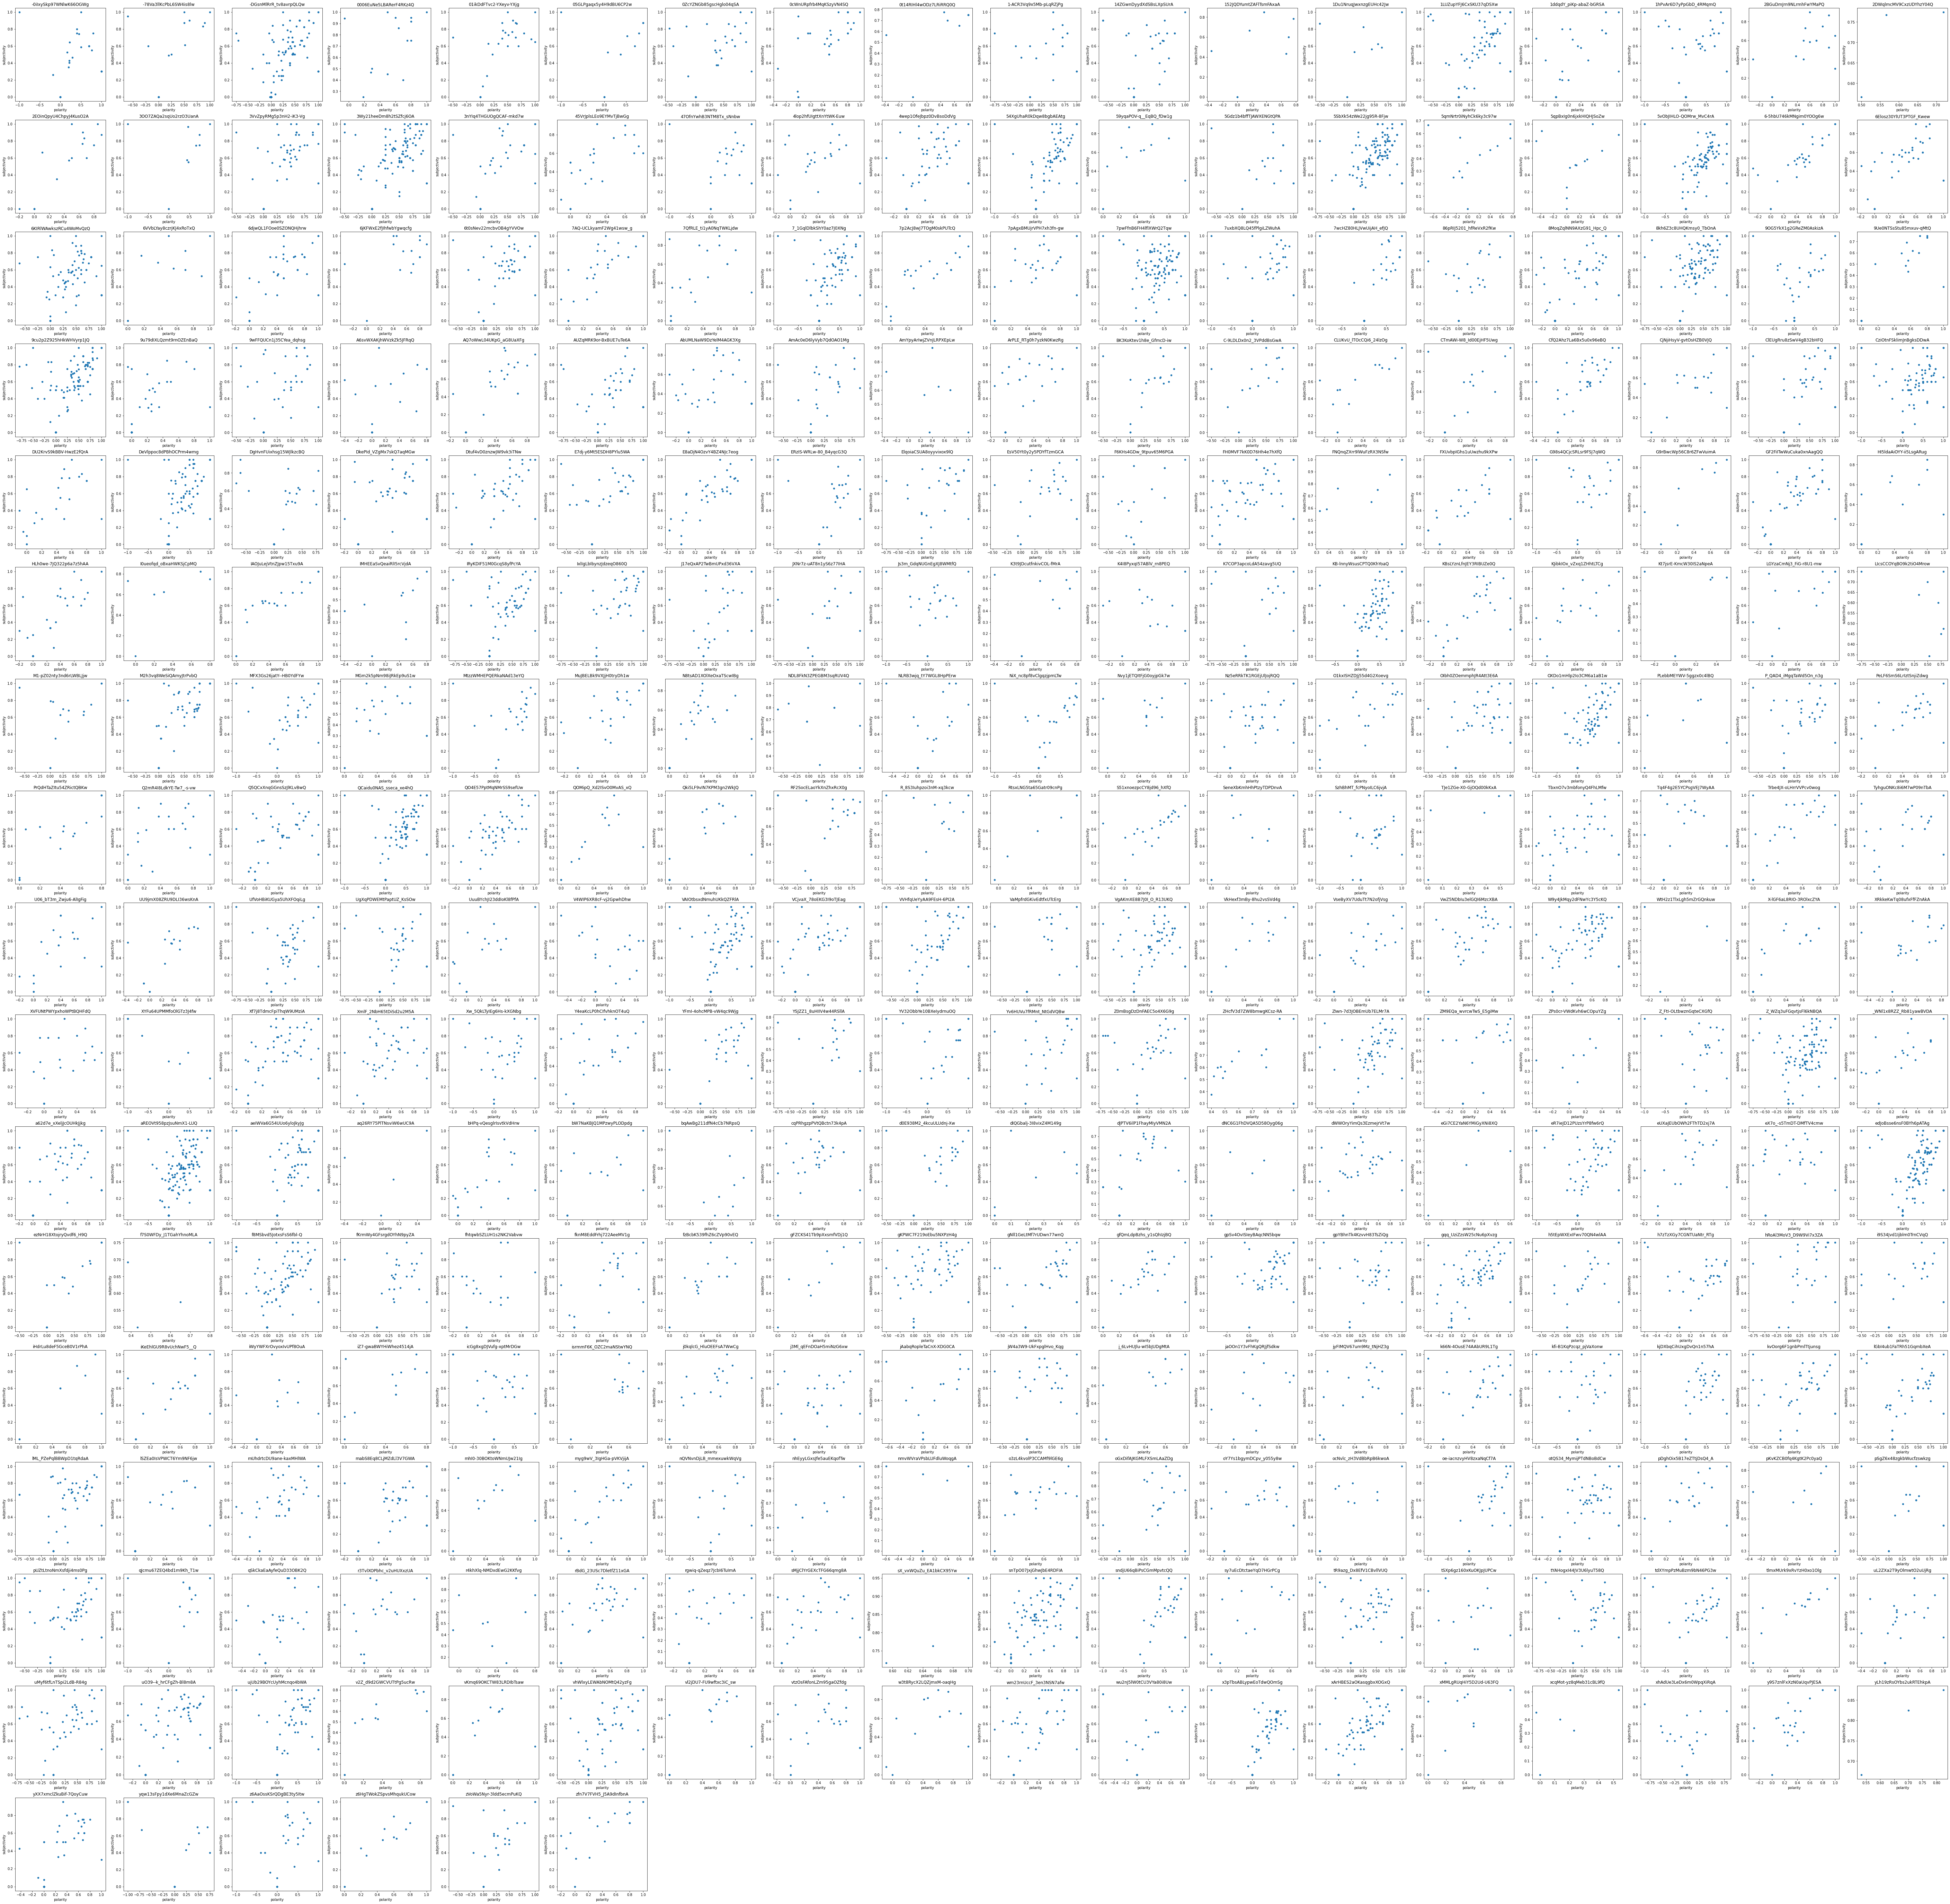

In [89]:
plot_by_biz(open_tip1)

In general, among open restaurants, there is an upward trend - as polarity increases, subjectivity also increases.  However, there's also several plots where as polarity goes toward 1 or -1, the subjectivity increases.  This means many opiniated people are reviewing the restaurant with stronger words of opinion more than others.  This can be subject to more analyzation.

In [90]:
%sql closed_tip << SELECT * FROM tip_data WHERE is_open == 0 and review_count > 100

Returning data to local variable closed_tip


In [91]:
closed_tip1 =  closed_tip[["business_id", "name", "polarity", "subjectivity"]]

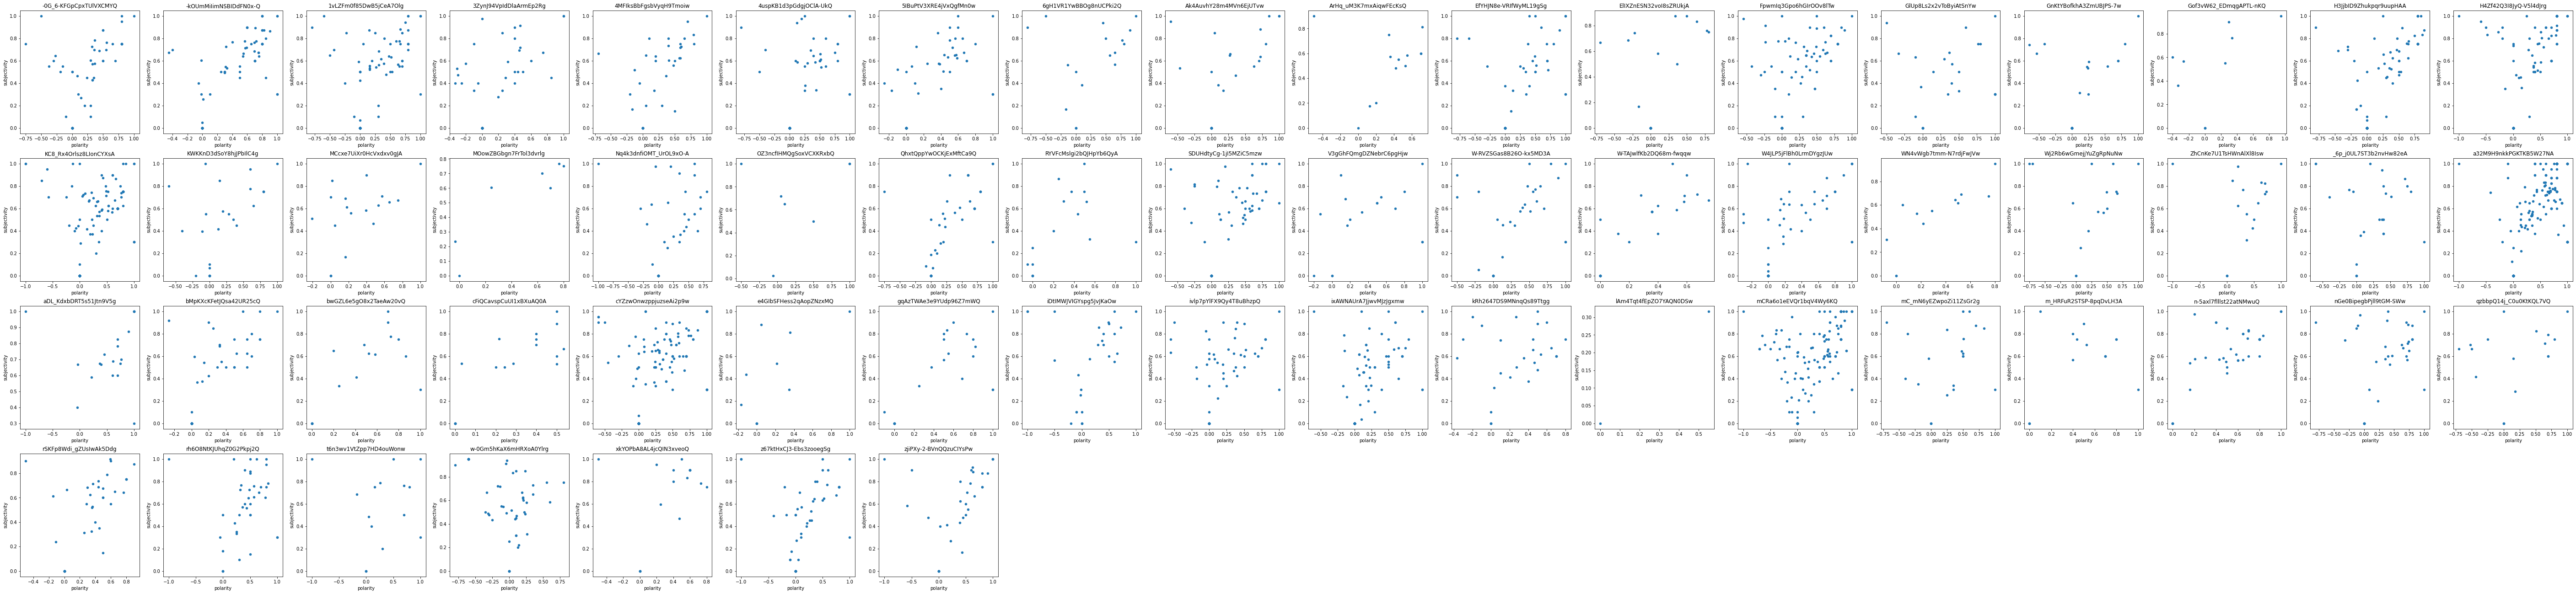

In [92]:
plot_by_biz(closed_tip1)

With closed restaurants, the regression lines are steeper, which means that the reviews are either very positive and very negative.  This means that for closed restaurants, the reviews had stronger words to express certain positive/negative opinions on the restaurant.

## Hypothesis 1
Null: there is no relationship between polarity of a review and the star rating of the restaurant in the 13 states.
Alternative: there is a positive relationship between polarity of a review and the star rating of the restaurant in the 13 states.


In [27]:
polarity_z = (tip_data["polarity"] - tip_data["polarity"].mean())/np.std(tip_data["polarity"])
stars_z = (tip_data["stars"] - tip_data["stars"].mean())/np.std(tip_data["stars"])
stats.ttest_ind(polarity_z, stars_z)

Ttest_indResult(statistic=-9.633743349558205e-13, pvalue=0.9999999999992314)

Since the p-value of 0.999 is greater than the significance level of 0.05, we fail to reject the null hypothesis.  Therefore, we have insufficient evidence that there is a relationship between the polarity of the reviews and the star ratings of restaurants in 13 states.

## Hypothesis 2
Is the number of service hours a restaurant is open for independent of whether or not the restaurant is no longer in business?

For this hypothesis test, we were working with a categorical binary variable, is_open, and a non-binary variable total_hrs. Since we are using both a binary and non-binary variable to find a relationship, we decided to use a **chi-squared test for independence**.

Chi Squared Test Reference that we used: https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/

Null hypothesis: There is no relationship between the number of service hours a restaurant is open for in a week and whether or not the restaurant is still in business.

Alternative hypothesis: There is a relationship between the number of service hours a restaurant is open for in a week and whether or not the restaurant is still in business.

In [28]:
total_hrs = []
for biz in all_samples_df.hours:
    total_hrs.append(open_hrs(biz))
all_samples_df["total_hrs"] = total_hrs

In [29]:
%sql group1 << SELECT * FROM all_samples_df WHERE total_hrs <= 42
%sql group2 << SELECT * FROM all_samples_df WHERE total_hrs > 42 AND total_hrs < 85
%sql group3 << SELECT * FROM all_samples_df WHERE total_hrs >= 85 AND total_hrs < 128
%sql group4 << SELECT * FROM all_samples_df WHERE total_hrs >= 128

Returning data to local variable group1
Returning data to local variable group2
Returning data to local variable group3
Returning data to local variable group4


In [30]:
%sql open1 << SELECT * FROM group1 WHERE is_open == 1
%sql closed1 << SELECT * FROM group1 WHERE is_open == 0
%sql open2 << SELECT * FROM group2 WHERE is_open == 1
%sql closed2 << SELECT * FROM group2 WHERE is_open == 0
%sql open3 << SELECT * FROM group3 WHERE is_open == 1
%sql closed3 << SELECT * FROM group3 WHERE is_open == 0
%sql open4 << SELECT * FROM group4 WHERE is_open == 1
%sql closed4 << SELECT * FROM group4 WHERE is_open == 0

Returning data to local variable open1
Returning data to local variable closed1
Returning data to local variable open2
Returning data to local variable closed2
Returning data to local variable open3
Returning data to local variable closed3
Returning data to local variable open4
Returning data to local variable closed4


In [31]:
contingencyTable = pd.DataFrame(index=['Open', 'Closed', 'RowTotal'])
contingencyTable["0-42"] = [len(open1),len(closed1),len(group1)]
contingencyTable["43-84"] = [len(open2),len(closed2),len(group2)]
contingencyTable["85-127"] = [len(open3),len(closed3),len(group3)]
contingencyTable["128-"] = [len(open4),len(closed4),len(group4)]
contingencyTable["Total"] = [len(open1)+len(open2)+len(open3)+len(open4),len(closed1)+len(closed2)+len(closed3)+len(closed4),1300]
observed = contingencyTable.iloc[0:2,0:4]
contingencyTable

,0-42,43-84,85-127,128-,Total
Open,89,500,300,69,958
Closed,56,216,64,6,342
RowTotal,145,716,364,75,1300


In [32]:
expected = np.outer(contingencyTable["Total"][0:2],
                     contingencyTable.loc["RowTotal"][0:4]) / 1300
expectedTable = pd.DataFrame(expected)
expectedTable.columns = ["0-42", "43-84", "85-127", "128-"]
expectedTable.index = ["Open", "Closed"]
expectedTable

,0-42,43-84,85-127,128-
Open,106.853846,527.636923,268.24,55.269231
Closed,38.146154,188.363077,95.76,19.730769


In [33]:
chiStat = (((observed-expected)**2)/expected).sum().sum()
print("Chi Squared Stat:", chiStat)

critical_value= chi2.ppf(q = 0.95, df = 3)
print("Critical value:",critical_value)

p_value = 1 - chi2.cdf(x=chiStat, df=3)
print("P value:",p_value)

Chi Squared Stat: 44.10248699617745
Critical value: 7.814727903251179
P value: 1.435392471549335e-09


Since the p-value of our chi squared test of independence is 1.44e-09 is less than 0.05, which is the significance level of our 95% confidence interval, we know that **there is a very high likelihood that there is a relationship between the number of service hours a restaurant is open for in a week and whether or not the restaurant is still in business.**